In [7]:
# Installing the required libraries. Only need to be run once per session. Uncomment and run the command:
# Note: !pip on Colab is equivalent to pip on terminal/command-line e.g. Windows cmd
#	rawpy: Lets you read and process RAW image files like .DNG, .CR2, .NEF. It gives you access to the RAW sensor data.
# imageio: Lets you save the processed image as .jpg, .png, etc., and optionally load images too.

!pip install rawpy imageio exifread
#!pip install exifread

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 18.7 MB/s eta 0:00:00


In [2]:
from google.colab import files
uploaded = files.upload()

Saving Shade.dng to Shade.dng


In [8]:
import exifread

# Open the file in binary mode
with open('Shade.dng', 'rb') as f:
    tags = exifread.process_file(f)

# Print key metadata
for tag in tags.keys():
    if "EXIF" in tag or "Image" in tag:
        print(f"{tag}: {tags[tag]}")

Image SubfileType: Reduced-resolution image
Image ImageWidth: 256
Image ImageLength: 170
Image BitsPerSample: [8, 8, 8]
Image Compression: Uncompressed
Image PhotometricInterpretation: 2
Image Make: NIKON CORPORATION
Image Model: NIKON D100
Image StripOffsets: 120358
Image Orientation: Horizontal (normal)
Image SamplesPerPixel: 3
Image RowsPerStrip: 170
Image StripByteCounts: 130560
Image PlanarConfiguration: 1
Image Software: Adobe Photoshop Lightroom
Image DateTime: 2009:04:15 07:57:24
Image Artist: Katrin Eismann
Image SubIFDs: 117060
Image ApplicationNotes: []
Image ExifOffset: 119380
Image TimeZoneOffset: [-4, -4]
Image Tag 0xC612: [1, 2, 0, 0]
Image Tag 0xC613: [1, 1, 0, 0]
Image Tag 0xC614: Nikon D100
Image Tag 0xC621: [801/1250, -1391/10000, -277/5000, -1933/2500, 15177/10000, 1381/5000, -663/10000, 833/10000, 3339/5000]
Image Tag 0xC622: [2951/5000, -933/10000, -391/5000, -4491/5000, 16719/10000, 1177/5000, -701/5000, 291/2000, 404/625]
Image Tag 0xC627: [1, 1, 1]
Image Tag 0x

In [9]:
import rawpy
dir(rawpy)
# help(rawpy)

['ColorSpace',
 'DemosaicAlgorithm',
 'Enum',
 'FBDDNoiseReductionMode',
 'HighlightMode',
 'ImageSizes',
 'LibRawBadCropError',
 'LibRawCancelledByCallbackError',
 'LibRawDataError',
 'LibRawError',
 'LibRawFatalError',
 'LibRawFileUnsupportedError',
 'LibRawIOError',
 'LibRawInputClosedError',
 'LibRawMemPoolOverflowError',
 'LibRawNoThumbnailError',
 'LibRawNonFatalError',
 'LibRawNotImplementedError',
 'LibRawOutOfOrderCallError',
 'LibRawRequestForNonexistentImageError',
 'LibRawTooBigError',
 'LibRawUnspecifiedError',
 'LibRawUnsufficientMemoryError',
 'LibRawUnsupportedThumbnailError',
 'NotSupportedError',
 'Params',
 'RawPy',
 'RawType',
 'ThumbFormat',
 'Thumbnail',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_rawpy',
 '_version',
 'absolute_import',
 'flags',
 'imread',
 'libraw_version',
 'namedtuple',
 'np',
 'os',
 'processed_image_wrapper',
 'rawpy',
 'sys',
 'warnings']

In [45]:
import rawpy

with rawpy.imread('Shade.dng') as raw:
    print(dir(raw))          # to shows available methods & attributes
    # print(raw.raw_pattern)   # it seems there is raw_pattern attribute so this is how we acess the Bayer layer

    # Exploring some of the methods and properties  on a rawpy object

    # Uncropped full sensor output
    raw_full = raw.raw_image # The full sensor array — including black borders, non-visible pixels, calibration zones
    # Usable RAW image data (no borders)
    raw_cropped = raw.raw_image_visible # clean cropped version of raw_image
    # Full demosaiced RGB image
    rgb_image = raw.postprocess(use_camera_wb=True, no_auto_bright=True, output_bps=8) # raw.postprocess() Converts the  RAW Bayer data into a full demosaiced RGB image

    # CFA (Bayer) pattern
    pattern = raw.raw_pattern
    print("CFA pattern:", pattern) # 0=Red, 1=Green, 2=Blue, 3=Green, so the [[0 1],  [3 2]] return means it is RGGB Bayer layer

    color_map = {0: 'R', 1: 'G', 2: 'B', 3: 'G'}
    named_pattern = np.vectorize(color_map.get)(pattern)
    print(named_pattern)

['__class__', '__delattr__', '__dir__', '__doc__', '__enter__', '__eq__', '__exit__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__ne__', '__new__', '__pyx_vtable__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', 'black_level_per_channel', 'camera_white_level_per_channel', 'camera_whitebalance', 'close', 'color_desc', 'color_matrix', 'daylight_whitebalance', 'dcraw_make_mem_image', 'dcraw_make_mem_thumb', 'dcraw_process', 'extract_thumb', 'num_colors', 'open_buffer', 'open_file', 'postprocess', 'raw_color', 'raw_colors', 'raw_colors_visible', 'raw_image', 'raw_image_visible', 'raw_pattern', 'raw_type', 'raw_value', 'raw_value_visible', 'rgb_xyz_matrix', 'sizes', 'tone_curve', 'unpack', 'unpack_thumb', 'white_level']
CFA pattern: [[1 0]
 [2 1]]
[['G' 'R']
 ['B' 'G']]


uint16
2024 3032
[[139 524 134 519 142]
 [ 58 128  55 142  64]
 [134 530 142 540 142]
 [ 54 139  61 139  55]
 [139 514 139 519 136]]


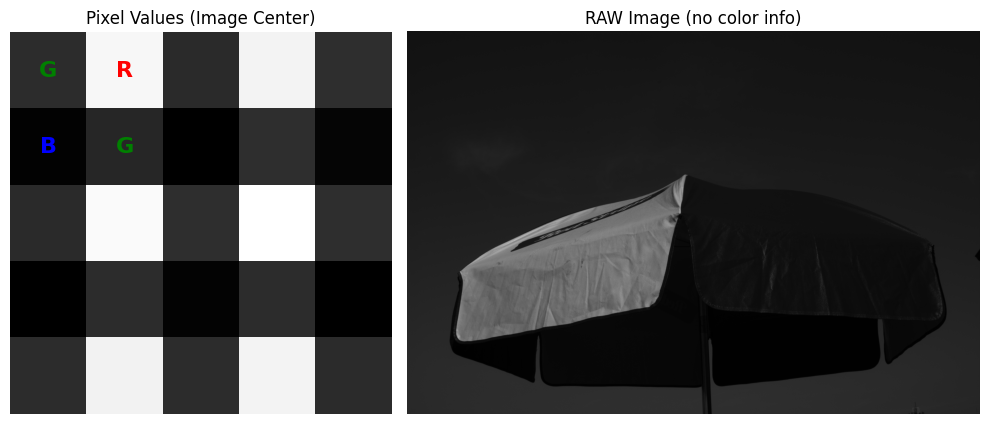

In [62]:
import rawpy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

dim =5

with rawpy.imread('Shade.dng') as raw:
    print(raw.raw_image_visible.dtype) # checking the data type
    bayer = raw.raw_image_visible.astype(np.uint16) # most camera sensors output 12-bit or 14-bit RAW. However, it is uint16 for this image. So essentially no need to use astype. I put for other cases we may use this script.

H, W= bayer.shape # let's get the raw image size. Note the .shape return (rows, columns)
print(H,W)

center_column = W //2
center_row = H //2
batch = bayer[center_row:center_row+dim, center_column:center_column+dim]
print(batch)

fig = plt.figure(figsize=(10, 5))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1.5])

ax0 = fig.add_subplot(gs[0])
ax0.imshow(batch, cmap='gray')
ax0.axis('off')
ax0.set_title('Pixel Values (Image Center)')

ax0.text(0, 0, 'G', color='green', fontsize=16, ha='center', va='center', weight='bold')
ax0.text(0, 1, 'B', color='blue', fontsize=16, ha='center', va='center', weight='bold')
ax0.text(1, 0, 'R', color='red', fontsize=16, ha='center', va='center', weight='bold')
ax0.text(1, 1, 'G', color='green', fontsize=16, ha='center', va='center', weight='bold')

ax1 = fig.add_subplot(gs[1])
ax1.imshow(bayer, cmap='gray')
ax1.axis('off')
ax1.set_title('RAW Image (no color info)')

plt.tight_layout()
plt.show()

sample dtype: uint16
sample max: 1017
H_raw= 2024 W_raw= 3032


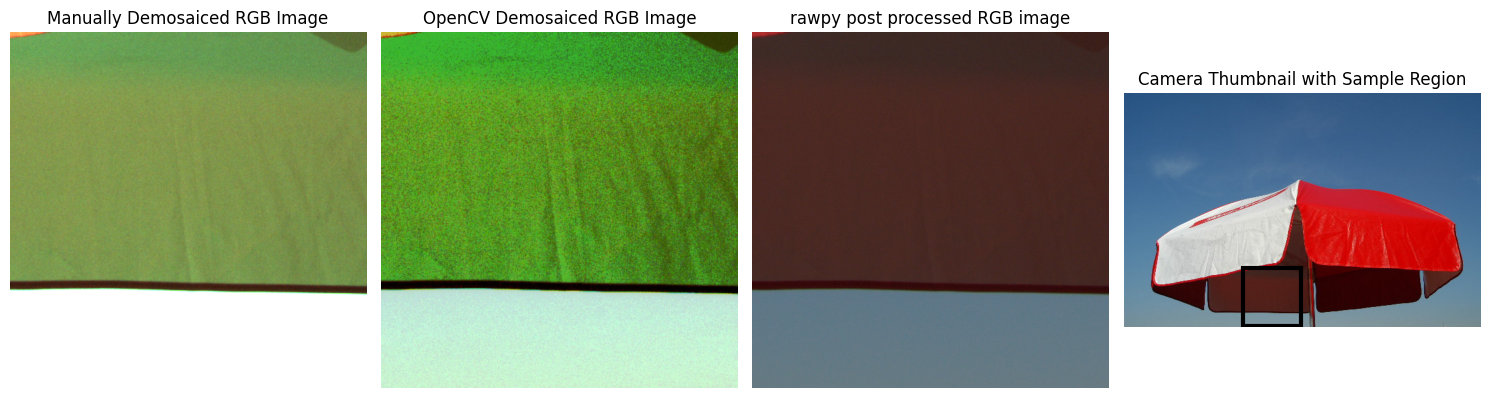

In [138]:
# performing manual demosaicig
import rawpy
from scipy.ndimage import convolve # Import convolve
import cv2
import matplotlib.patches as patches
import imageio.v2 as imageio  # `v2` avoids deprecation warnings
import io
from PIL import Image

######################################################################
dim = 500

######################################################################
with rawpy.imread('Shade.dng') as raw:
     bayer = raw.raw_image_visible.astype(np.uint16)
     rgb_image = raw.postprocess(use_camera_wb=True, no_auto_bright=True, output_bps=8) # raw.postprocess() Converts the  RAW Bayer data into a full demosaiced RGB image
     thumb = raw.extract_thumb()
     pattern = raw.raw_pattern

H, W = bayer.shape
center_column = H //2
center_row = W //2

######################################################################
## Manual Demosaicing a small sample

sample = bayer[center_row:center_row+dim, center_column:center_column+dim]
print("sample dtype:", sample.dtype)
print("sample max:", sample.max())

# color map based on Bayer layer info we got previously
color_map = {0: 'R', 1: 'G', 2: 'B', 3: 'G'}
# empty mask for each color. Default values 'False'
mask_R = np.zeros_like(sample, dtype=bool)
mask_G = np.zeros_like(sample, dtype=bool)
mask_B = np.zeros_like(sample, dtype=bool)

# Assign CFA pattern-based labels to each pixel in the patch
for y in range(sample.shape[0]):
    for x in range(sample.shape[1]):
        cy = y % 2  # row index within the 2×2 CFA tile
        cx = x % 2  # column index within the 2×2 CFA tile
        cfa_label = color_map[pattern[cy, cx]]

        if cfa_label == 'R':
            mask_R[y, x] = True
        elif cfa_label == 'G':
            mask_G[y, x] = True
        elif cfa_label == 'B':
            mask_B[y, x] = True

rgb_manual = np.zeros((dim,dim,3),dtype = np.float32)

rgb_manual[..., 0][mask_R] = sample[mask_R]  # R channel
rgb_manual[..., 1][mask_G] = sample[mask_G]  # G channel
rgb_manual[..., 2][mask_B] = sample[mask_B]  # B channel

# bilinear interpolation matrix kernel
kernel = np.array([[0.25, 0.5, 0.25],
                   [0.5 , 1.0, 0.5 ],
                   [0.25, 0.5, 0.25]])

# Interpolate missing values channel by channel
for c in range(3):  # Loop over Red, Green, Blue
    known = rgb_manual[..., c] > 0  # Mask of known (CFA) values
    smoothed = convolve(rgb_manual[..., c], kernel, mode='mirror')
    weights = convolve(known.astype(np.float32), kernel, mode='mirror') # A weight map that returns how many real (non-zero) values contributed to each interpolated value
    weights[weights == 0] = 1  # Prevent division by 0
    rgb_manual[..., c] = np.where(known, rgb_manual[..., c], smoothed / weights)

# Normalize and clip to [0, 255] range if needed
rgb_manual_norm = np.clip(rgb_manual, 0, 255).astype(np.uint8)

######################################################################
## rawpy post processed image

rgb_rawpy = rgb_image[center_row:center_row+dim, center_column:center_column+dim]

######################################################################
## Thumbnail

# Decode the thumbnail depending on format
if thumb.format == rawpy.ThumbFormat.JPEG:
    image = Image.open(io.BytesIO(thumb.data))
elif thumb.format == rawpy.ThumbFormat.BITMAP:
    image = Image.fromarray(thumb.data)
else:
    raise ValueError("Unknown thumbnail format")

# Convert to NumPy for plotting (if needed)
thumb_np = np.array(image)
thumb_H, thumb_W = thumb_np.shape[:2]
H_raw, W_raw = bayer.shape[:2]  # vertical (y), horizontal (x)
print('H_raw=',H_raw,'W_raw=', W_raw)

# Thumbnail size
H_thumb, W_thumb = thumb_np.shape[:2]

# Compute scale from RAW to thumbnail
scale_x = W_thumb / W_raw
scale_y = H_thumb / H_raw

# Sample patch origin in RAW image
x_raw = center_column  # horizontal (x)
y_raw = center_row     # vertical (y)

# Map to thumbnail coordinates
x_thumb = int(x_raw * scale_x)
y_thumb = int(y_raw * scale_y)

# Patch size in thumbnail scale
w_thumb = int(dim * scale_x)
h_thumb = int(dim * scale_y)

######################################################################
## OpenCV Demosaicing

# Normalize Bayer patch locally
sample_8bit = cv2.normalize(sample, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# Histogram equalized input
sample_eq = cv2.equalizeHist(sample_8bit)
rgb_cv2_eq = cv2.cvtColor(sample_eq, cv2.COLOR_BAYER_GR2BGR)

######################################################################
## Plotting

fig, axes = plt.subplots(1,4, figsize=(15,5))
axes[0].imshow(rgb_manual_norm)
axes[0].set_title("Manually Demosaiced RGB Image")
axes[0].axis('off')

axes[1].imshow(rgb_cv2_eq)
axes[1].set_title("OpenCV Demosaiced RGB Image")
axes[1].axis('off')

axes[2].imshow(rgb_rawpy)
axes[2].set_title("rawpy post processed RGB image")
axes[2].axis('off')

axes[3].imshow(thumb_np)
axes[3].set_title("Camera Thumbnail with Sample Region")
axes[3].axis('off')
rect = patches.Rectangle((x_thumb, y_thumb), w_thumb, h_thumb, linewidth=3, edgecolor='k', facecolor='none')
axes[3].add_patch(rect)

plt.tight_layout()
plt.show()